# PCA through Singular Value Decomposition

In [1]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R=np.matmul(X,X.T)/3
# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
print(U)
u1=U[:,0] # new basis vectors
u2=U[:,1]
print(u1)
print(u2)

# Calculate the coordinates in new orthonormal basis:
#Xi1=np.matmul(np.transpose(X),u1)
#Xi2=np.matmul(np.transpose(X),u2)
# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it

# Check that you got the original


[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
[-0.40455358 -0.9145143 ]
[-0.9145143   0.40455358]


# PCA on Iris data

In [2]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


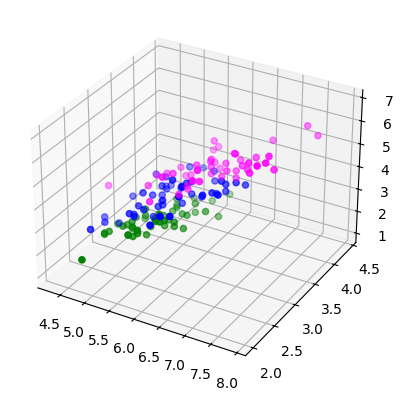

In [3]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,0],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,0],X[y==2,1],X[y==2,2],color='magenta')



[[ 0.05290845 -0.00491134  0.05999602  0.05975355]
 [-0.00491134  0.03298254 -0.02328082 -0.02111795]
 [ 0.05999602 -0.02328082  0.08952249  0.09149784]
 [ 0.05975355 -0.02111795  0.09149784  0.10086914]]


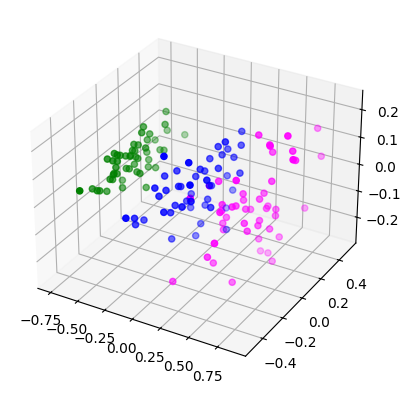

In [4]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Xscaler = StandardScaler()
Xscaler = MinMaxScaler()
Xpp=Xscaler.fit_transform(X)

# axes2=plt.axes(projection='3d')
# axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
# axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
# axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')

from sklearn import decomposition
# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
#plt.show


In [5]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
print("PCA Explained Variance (Power -> Information):",pca.explained_variance_)
print("PCA Explained Variance Ratio:",pca.explained_variance_ratio_)

PCA Explained Variance (Power -> Information): [0.23245325 0.0324682  0.00959685]
PCA Explained Variance Ratio: [0.84136038 0.11751808 0.03473561]


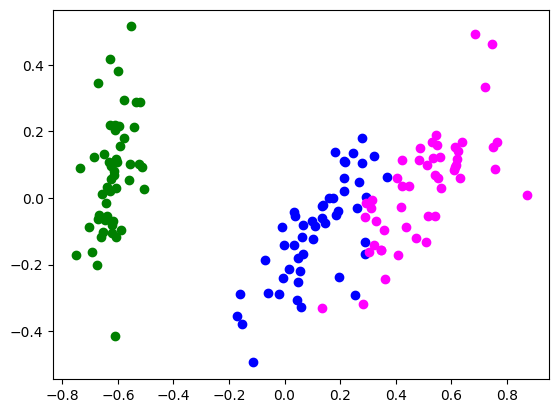

In [6]:
# Plot the principal components in 2D, mark different targets in color

plt.scatter(Xpca[y==0,0],Xpca[y==0,1],color='green')
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],color='blue')
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],color='magenta')

# KNN classifier

(105, 4)
(45, 4)
Performance 0.9777777777777777
[[20  0  0]
 [ 0  9  0]
 [ 0  1 15]]


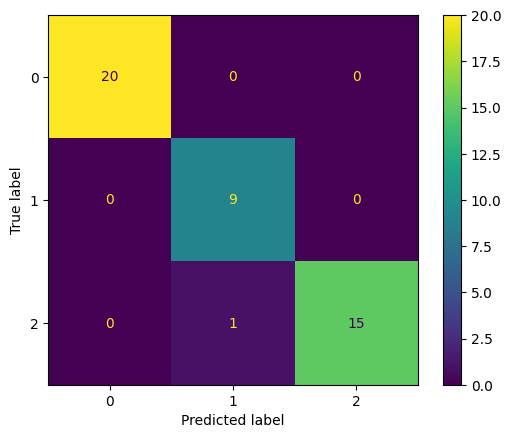

In [7]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
# KNN(Xpp)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
print("Performance",knn1.score(X_test,y_test))


# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



(105, 3)
(45, 3)
Performance 0.9333333333333333
[[13  0  0]
 [ 0 19  2]
 [ 0  1 10]]


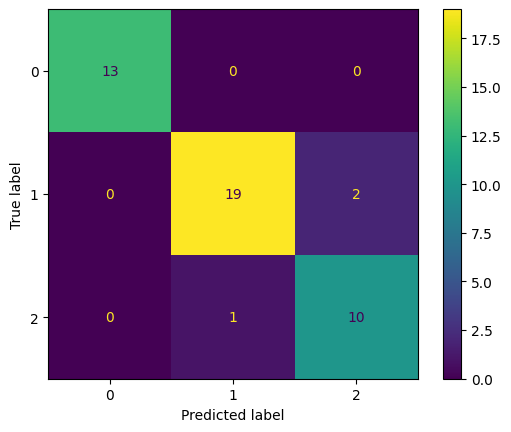

In [8]:
# KNN(Xpca) in 3D
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)


knn2=KNeighborsClassifier(n_neighbors = 3)
knn2.fit(X_train,y_train)
Ypred=knn2.predict(X_test)
print("Performance",knn2.score(X_test,y_test))

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

(105, 2)
(45, 2)
Performance 0.9111111111111111
[[16  0  0]
 [ 0 12  4]
 [ 0  0 13]]


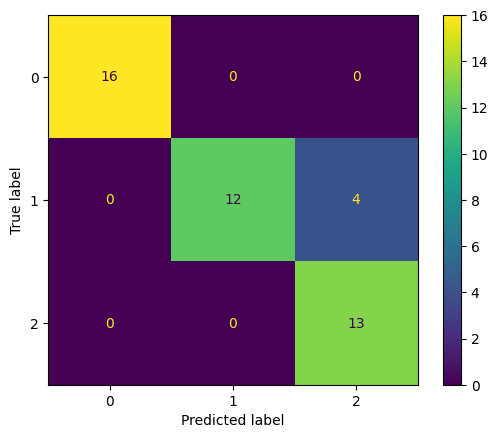

In [9]:
#KNN(Xpca(0+1))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca[:,0:2], y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)


knn3=KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train,y_train)
Ypred=knn3.predict(X_test)
print("Performance",knn3.score(X_test,y_test))

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)





(105, 2)
(45, 2)
Performance 0.5555555555555556
[[13  0  3]
 [ 6  5  4]
 [ 7  0  7]]


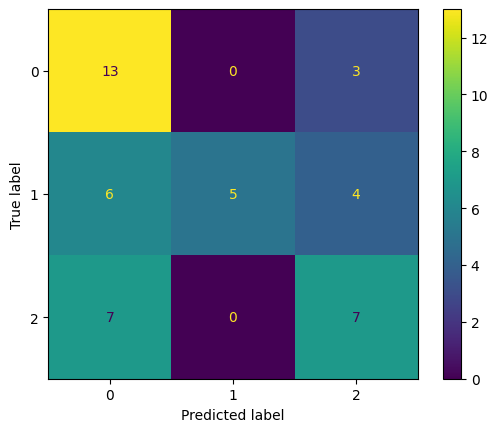

In [10]:
#KNN(Xpca(1+2))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca[:,-2:], y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)


knn4=KNeighborsClassifier(n_neighbors = 3)
knn4.fit(X_train,y_train)
Ypred=knn4.predict(X_test)
print("Performance",knn4.score(X_test,y_test))

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)





(105, 2)
(45, 2)
Performance 0.7777777777777778
[[15  1  0]
 [ 0 12  6]
 [ 0  3  8]]


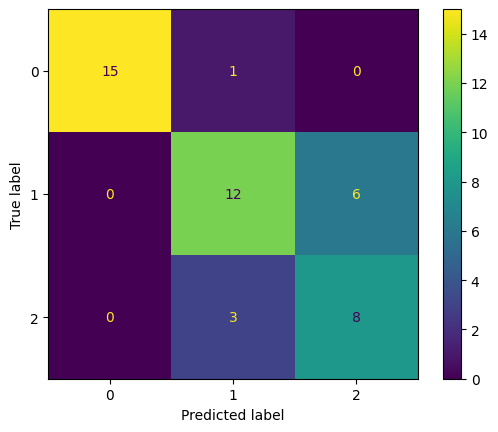

In [11]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
#KNN(Xpp(0+1))

# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
# KNN(Xpp)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpp[:,:2], y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

knn5=KNeighborsClassifier(n_neighbors = 3)
knn5.fit(X_train,y_train)
Ypred=knn5.predict(X_test)
print("Performance",knn5.score(X_test,y_test))

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)





# Comparison between the different KNN's:

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define datasets
datasets = {
    "KNN(Xpp)": Xpp,
    "KNN(Xpca)": Xpca,
    "KNN(Xpca(0+1))": Xpca[:,0:2],
    "KNN(Xpca(1+2))": Xpca[:,-2:],
    "KNN(Xpp(0+1))": Xpp[:,0:2]
}

# Dictionary to store results
results = {}



# Train and evaluate each KNN model
for name, M in datasets.items():
    # Split once for consistency
    X_train, X_test, y_train, y_test = train_test_split(M, y, test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = knn.score(X_test, y_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {"Accuracy": acc, "Confusion Matrix": conf_matrix}

    print(f"\n{name} Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test,y_pred))

# Sort results by accuracy in descending order (best first)
sorted_results = sorted(results.items(), key=lambda x: x[1]["Accuracy"], reverse=True)

# Print ranking
print("\n===== KNN Model Ranking Based on Accuracy =====")
for rank, (name, data) in enumerate(sorted_results, start=1):
    print(f"{rank}. {name} - Accuracy: {data['Accuracy']:.4f}")






KNN(Xpp) Accuracy: 0.9333
[[15  0  0]
 [ 0 13  1]
 [ 0  2 14]]

KNN(Xpca) Accuracy: 0.9333
[[19  0  0]
 [ 0 13  0]
 [ 0  3 10]]

KNN(Xpca(0+1)) Accuracy: 0.9556
[[17  0  0]
 [ 0 14  1]
 [ 0  1 12]]

KNN(Xpca(1+2)) Accuracy: 0.4889
[[7 3 3]
 [6 6 4]
 [4 3 9]]

KNN(Xpp(0+1)) Accuracy: 0.7778
[[15  1  0]
 [ 0  8  7]
 [ 0  2 12]]

===== KNN Model Ranking Based on Accuracy =====
1. KNN(Xpca(0+1)) - Accuracy: 0.9556
2. KNN(Xpp) - Accuracy: 0.9333
3. KNN(Xpca) - Accuracy: 0.9333
4. KNN(Xpp(0+1)) - Accuracy: 0.7778
5. KNN(Xpca(1+2)) - Accuracy: 0.4889
